# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [ ]:
#pd.set_option('display.max_columns', 50)

In [4]:
data_1 = len(data)
print(data_1)

23699


In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

При первичном анализе данных видны пропуски в "высоте потолков","апатраменты", "балкон", и картографические данные - расположение парков, водоемов, и пр. Если по первым трем пунктам пропуски из-за того что nan это отсутствие отметки об аппартаментах, и отсутсвие балкона; в других данных по близости вообще нет парков и аэропортов. Также нельзя исключить что это выбросы, и ошибки загрузки/выгрузки данных. имеются аномальные значение в максимальной площади объекта и максимальной цене.

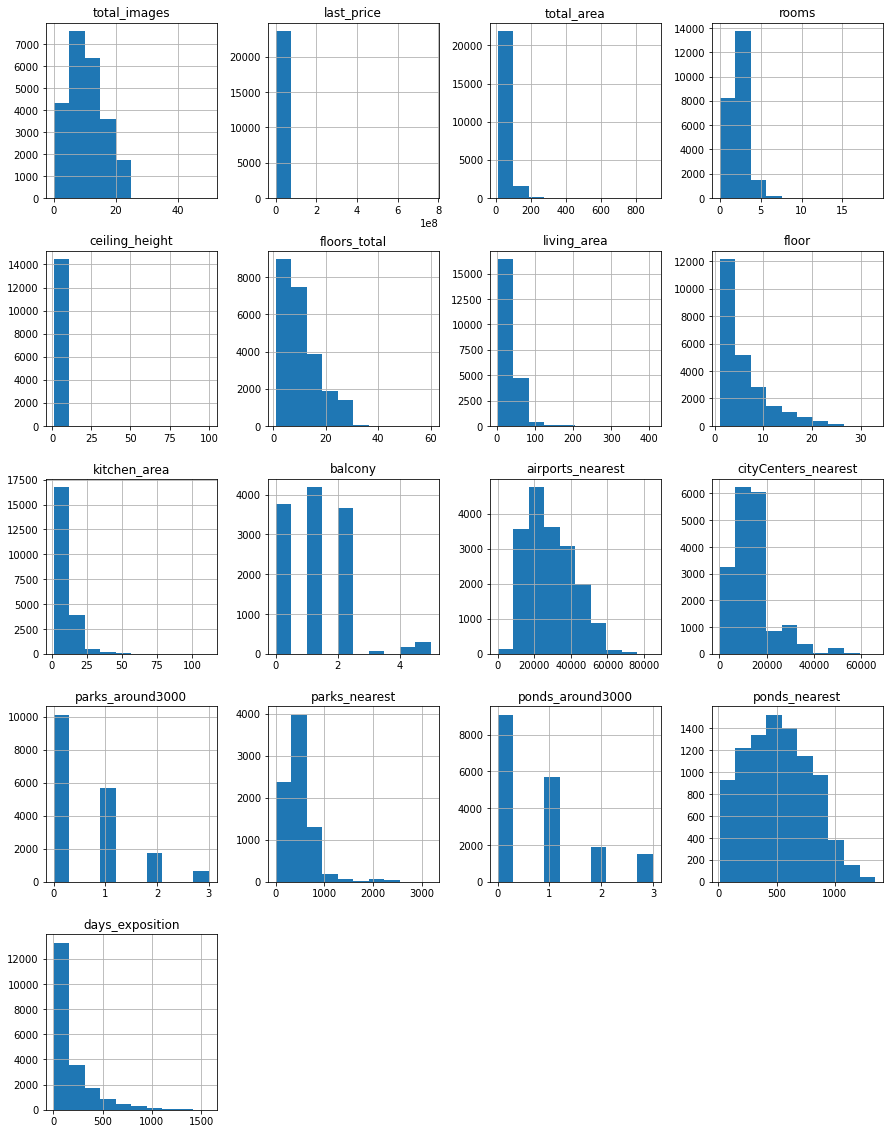

In [6]:
data.hist(figsize=(15, 20));

### Предобработка данных

    Убираем пропуски и некорректные данные
    Форматируем данные в колонке с датой и временем, в остальных данных тип корректный
 
    
    

In [7]:
data['first_day_exposition'] = data['first_day_exposition'].astype('datetime64')
print(data['first_day_exposition'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


In [8]:
data['locality_name'] = data['locality_name'].fillna("") 
wrong_names = ['поселок городского типа', 'посёлок городского типа', 'городской поселок', 'городской посёлок', 'поселок']
correct_name = 'посёлок'

def replace_names(name):
    for wrong_name in wrong_names:
        if wrong_name in name:
            return name.replace(wrong_name, correct_name)
    return name

data['locality_name'] = data['locality_name'].apply(replace_names)

Санкт-Петербург          15721
Ленинградская область     4368
Поселок                   2660
Деревня                    945
Садовое товарищество         5
Name: locality_name_category, dtype: int64


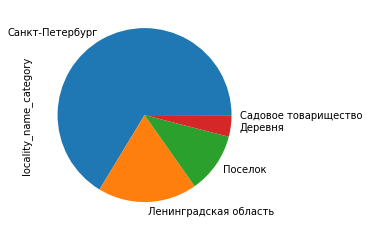

In [9]:
def sorting_place(name):
    if 'Санкт' in name:
        return 'Санкт-Петербург'
    elif 'садов' in name:
        return 'Садовое товарищество'
    elif 'поселок' in name or 'посёлок' in name:
        return 'Поселок'
    elif 'дерев' in name:
        return 'Деревня'
    else:
        return 'Ленинградская область'
        
data['locality_name_category'] = data['locality_name'].apply(sorting_place)
print(data['locality_name_category'].value_counts())
# кол-во объявлений по каждой категории
data['locality_name_category'].value_counts().plot(y='locality_name_category', kind='pie');

    Вычисляем долевое соотношение объявлений
    Также распределяем локацию по группам

In [10]:
data.duplicated().sum()

0

- Заполняем пропущенные значения там где это нужно и возможно. Делаем проверку (Не заполняем картографические данные, поскольку мы не сможем сделать это достоверно)

In [11]:
data['balcony'].fillna(0)
data.loc[((data['balcony'] == 1.5) & (data['balcony'] >= 2.5)), 'balcony'] = 2.0
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [12]:
list_of_nan = ['floors_total', 'kitchen_area', 'living_area', 'balcony']
for name in list_of_nan:
    print(data[name].isna().sum())
    
for name in list_of_nan: 
    for value in data['locality_name'].unique():
        s = data[(data['locality_name'] == value) & (data[name].notnull())][name]
        if len(s)>0:
            data.loc[(data['locality_name'] == value) & (data[name].isna()), name] = s.median()

for name in list_of_nan:
    print(data[name].isna().sum())

86
2278
1903
11519
0
19
17
105


Данные до заполнения и после. 

In [13]:
data['living_area'] = data['living_area'].where(data['total_area'] > data['living_area'], data['total_area'])
#проверка что жилая площадь не превышает общую
data['kitchen_area'] = data['kitchen_area'].where(data['total_area'] > data['kitchen_area'], data['total_area'])
#проверка что площадь кухни не превышает общую

**Высота потолков**

- Поменяем аномальную высоту потолков 22/23/24 метра. Разделим на 10 и получим стандартную высоту потолков.

In [14]:
data['ceiling_height'] = (data['ceiling_height'].where(data['ceiling_height'] < 20, data['ceiling_height'] / 10))
data['ceiling_height'].value_counts().head(10)
                                          

2.50    3522
2.60    1647
2.70    1582
3.00    1112
2.80     993
2.55     980
2.75     911
2.65     676
3.20     279
3.10     203
Name: ceiling_height, dtype: int64

In [15]:
data.loc[(data['ceiling_height'] >= 7), 'ceiling_height'] = 7

- Также уберем все потолки превышаюшие 7 метров

In [16]:
data['ceiling_height'].unique()

array([2.7 ,  nan, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57,
       4.15, 3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 ,
       3.06, 2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 5.2 , 2.87,
       2.66, 2.59, 2.  , 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55,
       3.16, 3.62, 3.12, 2.53, 2.74, 2.96, 2.46, 5.3 , 5.  , 2.79, 2.95,
       4.06, 2.94, 3.82, 3.54, 3.53, 2.83, 4.7 , 2.4 , 3.38, 3.01, 5.6 ,
       3.65, 3.9 , 3.18, 3.35, 2.3 , 3.57, 2.48, 2.62, 2.82, 3.98, 2.63,
       3.83, 3.52, 3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19,
       3.24, 4.8 , 4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 7.  ,
       3.26, 3.34, 2.81, 3.44, 2.97, 3.14, 4.37, 2.68, 3.22, 3.27, 4.1 ,
       2.93, 3.46, 3.47, 3.33, 3.63, 3.32, 1.2 , 2.98, 2.86, 3.17, 4.4 ,
       3.28, 3.04, 4.45, 5.5 , 3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 4.3 ,
       3.39, 2.69, 3.31, 4.65, 3.56, 2.2 , 3.51, 3.

In [17]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [18]:
data['ceiling_height'].head()

0    2.70
1    2.65
2    2.65
3    2.65
4    3.03
Name: ceiling_height, dtype: float64

In [19]:
data['ceiling_height'].isna().sum()

0

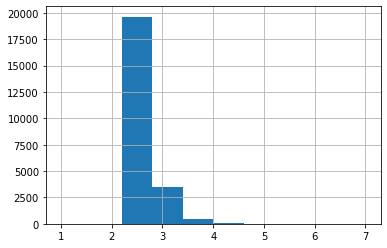

In [20]:
data['ceiling_height'].hist();

- Средняя высота потолков по выборке от 2,5 до 3 метров

**Этажность дома**

- Поставим порог этажности дома в 30 этажей

In [21]:
data['floors_total'] = data['floors_total'].where(data['floors_total'] > data['floor'], data['floors_total'])
#проверка что этаж не превышает общую этажность дома

In [22]:
data['floors_total'] = data['floors_total'].where(data['floors_total'] < 30, data['floors_total']/10).round()

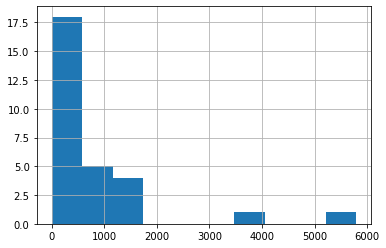

In [23]:
data['floors_total'].value_counts().hist(bins=10);

In [24]:
data['floors_total'].isna().sum()

0

- Наблюдаем на графике что в общая этажность домов это новостройки (в среднем 18 этажей) или "сталинки" по 5 этажей в доме. 

In [25]:
data.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_category
5582,2,4340000.0,37.1,2018-07-02,1,2.65,16.0,14.3,14,NaN,...,1.0,Санкт-Петербург,30201.0,9049.0,0.0,NaN,0.0,NaN,45.0,Санкт-Петербург
14434,6,5200000.0,62.0,2015-08-11,2,2.55,10.0,35.0,8,False,...,2.0,посёлок Шушары,12416.0,18203.0,0.0,NaN,0.0,NaN,415.0,Поселок
1780,5,3550000.0,33.0,2017-09-12,1,2.55,18.0,18.0,9,NaN,...,2.0,Санкт-Петербург,14861.0,12449.0,0.0,NaN,0.0,NaN,184.0,Санкт-Петербург
15960,4,9400000.0,84.6,2018-02-01,3,2.65,11.0,31.3,2,NaN,...,1.0,Санкт-Петербург,23752.0,5552.0,0.0,NaN,1.0,502.0,58.0,Санкт-Петербург
21247,5,2330000.0,24.0,2018-01-01,1,2.65,24.0,16.0,16,NaN,...,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,68.0,Поселок


In [1]:
#new_data.shape[0] / old_data.shape[0]

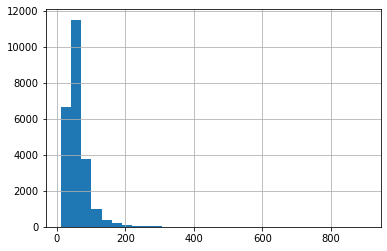

In [26]:
#код ревьюера
data['total_area'].hist(bins=30);

**Отсечем выбросы по площади жилья**


In [27]:
data.loc[(data['total_area'] >= 200), 'total_area'] = data['total_area'].median()

In [28]:
data['total_area'].isna().sum()

0

In [29]:
data['total_area'].value_counts().head(10)

52.0    449
45.0    419
42.0    383
60.0    347
31.0    346
44.0    345
40.0    315
43.0    301
32.0    289
46.0    282
Name: total_area, dtype: int64

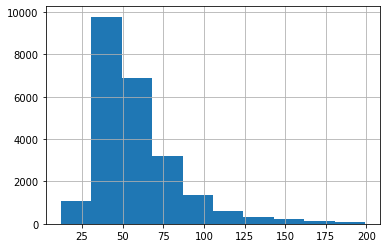

In [30]:
data['total_area'].hist();

Средняя площадь продаваемых объектов от 30 до 60 кв.м

**Выбросы по кол-ву комнат**

In [31]:
data.loc[(data['rooms'] >= 7), 'rooms'] = 7

In [32]:
data['rooms'].value_counts()

1    8047
2    7940
3    5814
4    1180
5     326
0     197
6     105
7      90
Name: rooms, dtype: int64

<AxesSubplot:>

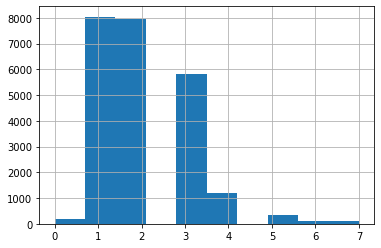

In [33]:
data['rooms'].hist()

Самые популярные к продаже это однокомнатные и двухкомнатные квартиры

### Посчитайте и добавьте в таблицу новые столбцы

<h1>3.1</h1>

**Цена за один квадратный метр**


In [34]:
data['quadratmetr'] = data['last_price']/data['total_area']

In [35]:
#data.loc[(data['quadratmetr'] > 200000), 'quadratmetr'] = data['quadratmetr'].median()

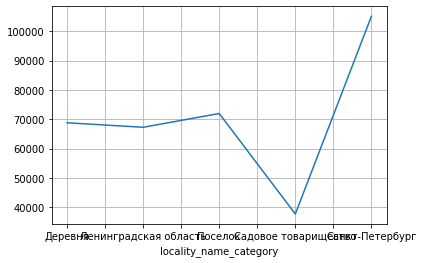

In [36]:
data.groupby('locality_name_category')['quadratmetr'].agg('median').plot(grid=True);

In [37]:
#data['quadratmetr'].value_counts().head(10)


    Самая бюджетная цена в объявлениях о продаже в Садовом товариществе (не более 40 000 р за кв.м)
    В деревне, поселке городского типа и в Ленобласти средняя цена почти одинаковая (от 68 000 до 72 000 рублей за кв.м)
    В Санкт-Петербурге цена за кв метр в среднем стартует от 100 000 рублей 

<h1>3.2-3.4</h1>

**День , месяц и год публикации обьявления**

In [38]:
data['day_of_week'] = data['first_day_exposition'].dt.dayofweek
data['month_of_pub'] = data['first_day_exposition'].dt.month
data['year_of_pub'] = data['first_day_exposition'].dt.year
pd.set_option('display.max_columns', 50)

<h1>3.5</h1>

**Распределили по типу этажа квартиры**

In [39]:
def type_floor(row):
    if 1 == row['floor']:
        return 'первый'
    elif row['floors_total'] == row['floor']:
        return 'последний'
    else:
        return 'другой'

data['first_last_floor'] = data.apply(type_floor, axis=1)
floors_about = data['first_last_floor'].value_counts()
print(floors_about)

другой       17440
последний     3342
первый        2917
Name: first_last_floor, dtype: int64


<h1>3.6</h1>

**Расстояние до центра города в километрах**

In [40]:
data['km'] = (data['cityCenters_nearest']/1000).round()

In [41]:
data['km'].head()

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: km, dtype: float64

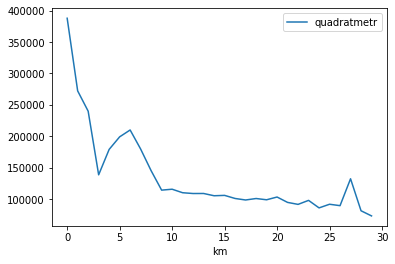

In [42]:
group_spb = data[data['locality_name']=='Санкт-Петербург'].copy()
group_spb.groupby('km')[['quadratmetr']].mean().plot();

- В СПб найдено три пиковых значения в стоимости кв метра. В самом центре города, в 5 км от центра и в 27 км.

<h1>4.1</h1> Изучаем параметры

<AxesSubplot:>

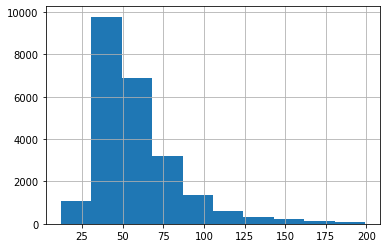

In [43]:
data['total_area'].hist()


**Общая площадь**

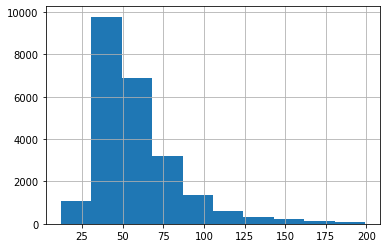

In [44]:
data['total_area'].hist();

 - Выражена частота продажи квартир общей площадью от 30 до 50 кв м

**Жилая площадь**

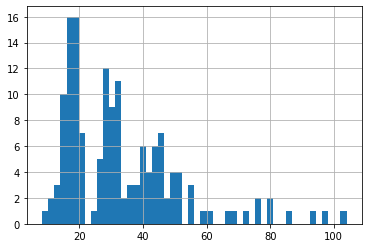

In [45]:
data['living_area'][:150].hist(bins=50);

 - Жилая площадь варьируется от 20 до 30 кв м

**Площадь кухни**

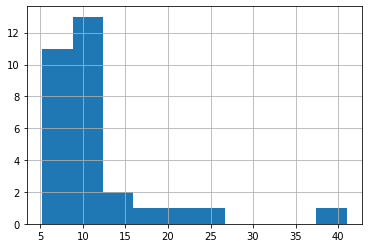

In [46]:
data['kitchen_area'][:30].hist(grid=True);

 - Площадь кухни варьируется от 5 до 12 кв м

**Кол-во комнат** выше

<AxesSubplot:>

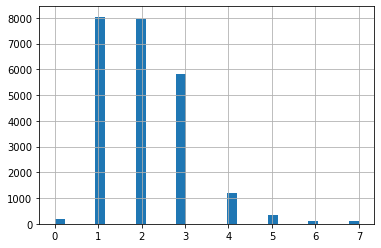

In [47]:
data['rooms'].hist(bins=30)

Чаще продают однушки и двушки, чуть реже трешки.

**Высота потолков**

In [2]:
data['ceiling_height'][2:4].hist(grid=True);

NameError: name 'data' is not defined

 - Средняя высота потолков до 2,7 м

**Этаж квартиры**

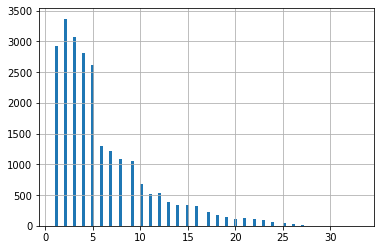

In [49]:
data['floor'].hist(grid=True, bins=100);

 - Чаще на продажу выставляют квартиры на втором этаже

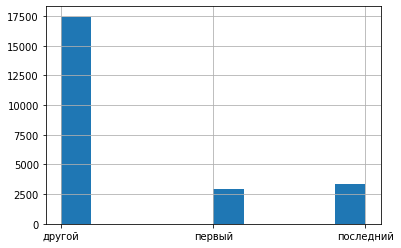

In [50]:
data['first_last_floor'].hist(grid=True);

 - Почти одинаковая по кол-ву объявлений продажа на первом и последнем этажах

**Этажность дома**

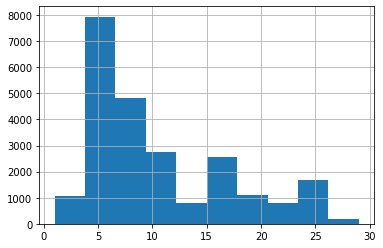

In [51]:
data['floors_total'].hist(grid=True);

 - В СПб средняя этажность дома составляет 5 этажей и выше

**Расположение от центра**

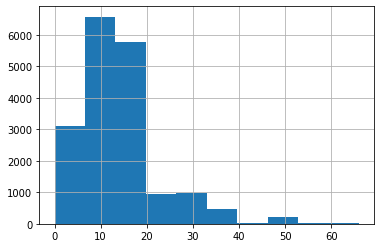

In [52]:
data['km'].hist(grid=True);

 - С среднем наибольшее число обьяслений о продаже в СПб находится в 10 км от центра города

**Расстояние до аэропорта**

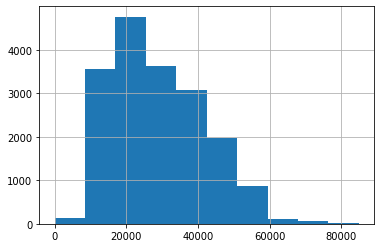

In [53]:
data['airports_nearest'].hist(grid=True);

Квартиры где указано близкое расположение  к аэропорту находятся в 20 км от центра города

**Расстояние до парков**

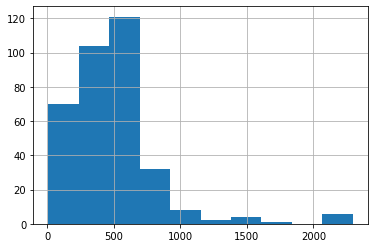

In [54]:
data['parks_nearest'][:1000].hist(grid=True);

 - Если указано расстояние до парка, то в среднем парки располагаются в 500 м от объекта продажи

**Месяц публикации**

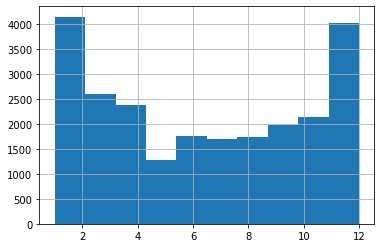

In [55]:
data['month_of_pub'].hist(grid=True);

 - Чаще объявления о продаже выставляли зимой, реже весной.

**Год публикации**

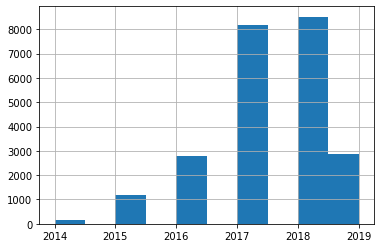

In [56]:
data['year_of_pub'].hist(grid=True);

 - Топ обьявлений были выставлены в 2017-2018 году

<h1>4.2</h1>

**Изучим скорость продажи квартиры**

                      days_exposition
locality_name                        
                            82.869565
Бокситогорск                62.916667
Волосово                    74.117647
Волхов                      82.796875
Всеволожск                  78.866071
...                               ...
село Путилово               75.000000
село Рождествено            99.000000
село Русско-Высоцкое        39.333333
село Старая Ладога          45.000000
село Шум                     9.000000

[262 rows x 1 columns]

                      days_exposition
locality_name                        
                                 78.0
Бокситогорск                     45.0
Волосово                         75.0
Волхов                           72.0
Всеволожск                       60.0
...                               ...
село Путилово                    75.0
село Рождествено                 99.0
село Русско-Высоцкое             45.0
село Старая Ладога               45.0
село Шум                 

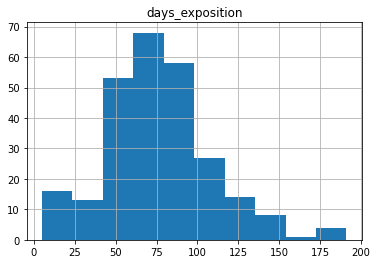

In [57]:
data['days_exposition'] = (data['days_exposition'].where(data['days_exposition'] < 200))
exposition_total_mean = data.pivot_table(index='locality_name', values='days_exposition', aggfunc='mean')
exposition_total_median = data.pivot_table(index='locality_name', values='days_exposition', aggfunc='median')
print(exposition_total_mean)
print()
print(exposition_total_median)
exposition_total_mean.hist();


**Вывод:** в среднем объявления о продаже висели от 40 до 90 дней

In [58]:
data['days_exposition'].value_counts().head()

45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
Name: days_exposition, dtype: int64

<h1>4.3</h1>

**Какие факторы больше всего влияют на общую (полную) стоимость объекта**

In [59]:
#data.corr()
cor = data[['last_price', 'total_area', 'rooms', 'kitchen_area', 'first_last_floor']].corr()
print(cor)

              last_price  total_area     rooms  kitchen_area  day_of_week  \
last_price      1.000000    0.363856  0.356124      0.420308     0.001550   
total_area      0.363856    1.000000  0.733097      0.452814    -0.014370   
rooms           0.356124    0.733097  1.000000      0.238814    -0.004494   
kitchen_area    0.420308    0.452814  0.238814      1.000000    -0.008427   
day_of_week     0.001550   -0.014370 -0.004494     -0.008427     1.000000   
month_of_pub    0.002779    0.007655 -0.003402      0.002393     0.011496   
year_of_pub    -0.043089   -0.082533 -0.056023     -0.050359    -0.004799   

              month_of_pub  year_of_pub  
last_price        0.002779    -0.043089  
total_area        0.007655    -0.082533  
rooms            -0.003402    -0.056023  
kitchen_area      0.002393    -0.050359  
day_of_week       0.011496    -0.004799  
month_of_pub      1.000000    -0.269642  
year_of_pub      -0.269642     1.000000  


 - Столбцы с днем недели, месяцем и датой публикации являются категориальными, поэтому рассчитывать корреляцию для них нельзя

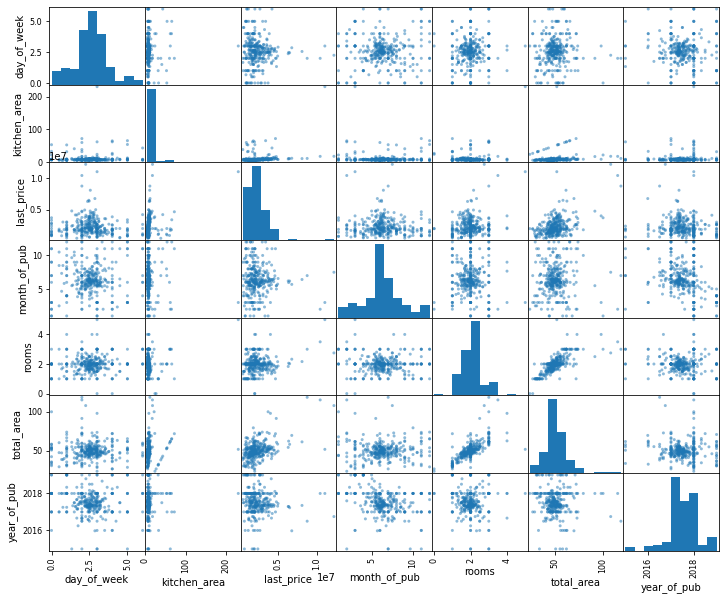

In [60]:
cor_table = data.pivot_table(index='locality_name', values=['last_price', 'total_area', 'rooms', 'kitchen_area', 'first_last_floor', 'day_of_week', 'month_of_pub', 'year_of_pub'])
pd.plotting.scatter_matrix(cor_table, figsize=(12, 10));

**Вывод:** В таблице корреляции найдена зависимость Цены квартиры от общей площади, жилой площади и площади кухни. И от цены за кв м - что логично. Есть зависимость цены за кв м от высоты потолков, и чуть слабее от расположения парков и водоемов вблизи объекта.
Построим матрицу рассеивания что бы убедиться в этом наглядно.

In [61]:
data.pivot_table(index='locality_name_category', values=['quadratmetr', 'last_price', 'cityCenters_nearest', 'total_area'])


,cityCenters_nearest,last_price,quadratmetr,total_area
locality_name_category,,,,
Деревня,NaN,3.316106e+06,68266.575490,49.502497
Ленинградская область,34204.472100,3.689329e+06,69505.045214,52.797145
Поселок,23529.807568,3.390312e+06,70358.617304,49.458812
Садовое товарищество,NaN,2.110000e+06,43549.805566,52.000000
Санкт-Петербург,11601.291571,8.062507e+06,128349.389265,61.547615


**Зависимость цены от категории этажа**

In [62]:
data.pivot_table(index='first_last_floor', values='last_price', aggfunc='mean')

,last_price
first_last_floor,
другой,6.676129e+06
первый,4.803560e+06
последний,7.356221e+06


 - Первый этаж дешевле, чем остальные этажи, но последний дороже других.

**Зависимость цены от дня недели, месяца и года публикации** (на примере двухкомнатных квартир)

In [63]:
data.pivot_table(index=['day_of_week'], values=['last_price', 'rooms'], aggfunc='median')


,last_price,rooms
day_of_week,,
0,4650000.0,2
1,4730000.0,2
2,4700000.0,2
3,4650000.0,2
4,4585000.0,2
5,4555000.0,2
6,4550000.0,2


 - В конце недели дешевле чем в начале

In [64]:
data.pivot_table(index='month_of_pub', values=['last_price', 'rooms'], aggfunc='median')

,last_price,rooms
month_of_pub,,
1,4600000.0,2
2,4650000.0,2
3,4650000.0,2
4,4800000.0,2
5,4515000.0,2
6,4400000.0,2
7,4650000.0,2
8,4570000.0,2
9,4700000.0,2


 - Летом цены на недвижимость снижаются, но возрастают к зиме

In [65]:
data.pivot_table(index='year_of_pub', values=['last_price', 'rooms'], aggfunc='median')

,last_price,rooms
year_of_pub,,
2014,7700000.0,3
2015,5350000.0,2
2016,4550000.0,2
2017,4500000.0,2
2018,4550000.0,2
2019,5050000.0,2


        В 2015 году цена на 2х комнатные была выше чем в 16, 17, 18 - м годах.
        в 2019 году цена вновь возросла

<h1>4.4</h1>

**Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [66]:
df = data.pivot_table(index='locality_name', values='quadratmetr', aggfunc=['count','mean'])
df.sort_values(by=df.columns[0], ascending=False).head(10)

,count,mean
,quadratmetr,quadratmetr
locality_name,,
Санкт-Петербург,15721,128349.389265
посёлок Мурино,556,85681.762601
посёлок Шушары,440,78677.364217
Всеволожск,398,68654.473986
Пушкин,369,109397.577401
Колпино,338,77209.870028
посёлок Парголово,327,90520.614136
Гатчина,307,68746.146763


        ТОП 10 по числу обьявлений: в самом СПб, где стоимость кв метра в среднем 128 000 р, наименьшая стоимость кв метра в Выборге - 58 000 р

<h1>4.5</h1>

**Cредняя цена километра в СПб**

In [67]:
mean_price_km = data.query('locality_name =="Санкт-Петербург"').pivot_table(index='km', values=['last_price'], aggfunc='median')
mean_price_km.head(30)

,last_price
km,
0.0,17900000.0
1.0,11395000.0
2.0,10000000.0
3.0,8409000.0
4.0,9200000.0
5.0,9500000.0
6.0,8900000.0
7.0,7800000.0
8.0,7450000.0


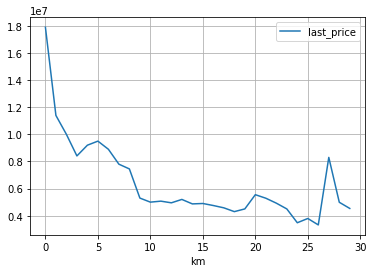

In [68]:
mean_price_km.plot(grid=True);

**Самый дорогой первый км - 6,5 млн р; второй км стоит 1,4 млн р и так далее по убыванию.**

проверка кол-ва строк в датасете

In [69]:
data_2 = len(data)
print(data_2)

23699


<h1>5 Общий вывод</h1>

<div class="alert alert-blue">
<b> Общий вывод :</b> 
<br>Мы провели анализ базы данных о продажи недвижимости по Северо-Западу. Провели предобработку даннных, добавили новые колонки - цена за один квадратный метр, день недели, месяц и год публикации, расстояние до центра города в км. Выставили пороговые значения в колонке по кол-ву комнат, высоты потолков, общей площади и площадь кухни, этажности дома и по длительности продажи. 
И сделали следующие выводы:
    <br>-
Самая бюджетная цена в объявлениях о продаже в Садовом товариществе (не более 40 000 р за кв.м)
В деревне, поселке городского типа и в Ленобласти средняя цена почти одинаковая (от 68 000 до 72 000 рублей за кв.м)
В Санкт-Петербурге цена за кв метр в среднем стартует от 100 000 рублей 
    <br>-Три пиковых значения в стоимости квартиры в Санкт-Петербурге: В самом центре города , на расстоянии 5 км от центра и на расстоянии 27 км.
    <br>-В среднем объявления о продаже висели от 2,5 до 3 месяцев.
    <br>-Квартиры чаще продают зимой, когда цены на недвижимость возрастают и летом цена снижается и кол-во объявлений тоже.
    <br>-В таблице корреляции найдена зависимость Цены квартиры от общей площади, жилой площади и площади кухни и кол-ва комнат
    <br>-Больше всего объявлений о продаже в самом СПб, где стоимость кв метра в среднем 128 000 р, наименьшая стоимость кв метра в Выборге - 58 000 р
    <br>-Цены на нежвижимость стартуют от 3,5 - 5 млн рублей в радиусе до 30 км от центра города. Начиная с радиуса 9 км каждый км  по направлению в центр добавляет к стоимости 1-2 млн рублей. 
</div>